### Name:
### Student Number:

# Python Workbook 7 - Integration

## Introduction

In this practical we will use Python to study integration and some of its applications (average value, area, etc).
 
### Mathematics Concepts

 * The __indefinite integral__ (or __anti-derivative__) of a function, $f(x)$, is the function, $F(x)$ defined by
 
\\[
    F(x) = \int f(x) dx + C      \implies \frac{dF}{dx} = f(x)
\\]

where $C$ is an arbitrary constant (called __the constant of integration__).


 * The __definite integral__ of a function, $f(x)$, is the *number*, $A$, defined by
 
\\[
    A = \int_a^b f(x) dx 
\\]

and **if** $f(x)\ge 0$ then the definite integral is equal to the area between the function and the x-axis over the interval $x=a$ to $x=b$.

![](http://www.drcruzan.com/Images/Mathematics/DefiniteIntegrals/GeometryAnalyticBox.png)
 
### Python Functions

 * The Python symbolic module, __sympy__, has functions 
    * __symbols__ or (better) __Symbol__ define a symbol 
    * __Function__ to define a symbolic funciton
    * __limit(f, t, t0)__ - compute the limit of the experssion, __f__, as the variable __t__ tends towards __t0__.
    * __diff(f, t)__ - differentiation the function, __f__, with respect to variable __t__.
    * __display__ to dispaly an experssion using mathematics notation.
    * __integrate(f,t)__ to calculate the indefinite integral of $f(t)$.
    * __integrate(f,(t,a,b))__ to calculate the definite integral of $f(t)$ over the interval $t=a$ to $t=b$.
and standard methods 
    * __subs(exp_old,exp_new)__ to substitute sub-expresion __exp_old__ with __exp_new__. 
    * __solve(e,x)__ to solve equation $e=0$ for variable $x$


In [4]:
# for numeric work
import numpy as np
import matplotlib.pyplot as plt

# for symbolic work
from sympy import *
from sympy.plotting import plot
from sympy import init_printing
init_printing()


## Example 1 - Indefinite Integration

Given the function 
\\[
f(x)=x^3+x^2+1
\\]
answer the following:

1. Find the indefinite integral of $f(x)$.

2. Check that the derivative of this integral returns the original function.

### Part 1:

To answer this we must first define the __symbol__ $x$ in the ususla way. We are also going to require a second symbol $C$, to denote the arbitrary __integration constant__.

In [35]:
x = symbols('x')
c = symbols('c')

Next we define the function $f(x)$:

In [36]:
f=x**3+x**2+1

To find the idefinite integral of $f$ we use the __sympy__ function __integrate(f,x)__.

This function requires __two arguments__:

* The funciton $f$ we wish to integrate

* The varibale $x$ we wish to integrate with respect to

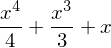

In [37]:
integrate(f,x)

Notice that the integral does not contain an arbitrary integration constant. We mus add this manually, to give the following __anti-derivative__

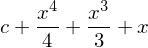

In [38]:
F=integrate(f,x)+c
F

### Part 2

Since __F__ as defined above is an anti-derivative of $f$, this means that if we __differnetate F__ we should get back __f__. 

We can check this using the familiar __sympy__ function __diff()__

In [39]:
diff(F,x)

Hence weh we differentate __F__ it returns the original function $f$.

## Exercise 1

Given the functions
\\[
g(t)=e^{2t}\sin(\pi t)\\
h(s)=\ln(s)
\\]
answer the following:

1. Declare symbols $s$ and $t$

2. Find the anti-derivative of $g(t)$ and $h(s)$

3. Differentiate these anti-derivatives and ensure this returns the original function, in each case.

__Note:__ The function $e^{t}$ is written in Python as __exp(t)__. The function $\ln(s)$ is written in Python as __log(s)__

## Example 2 - Definite Integration

Evaluate the following __definite integal__ 

\\[
\int_{-2}^{1} (x^2+1) dx.
\\]

This can be achieved directly, by including an extra pair of parameters in the __integrate(f,x)__ function:

* First we define a function to represent the __integrand__ (just to make life it easier to work with)

In [47]:
p=x**2+1

* Next we integrate this function between the __limits__ -2 and 1 as follows:

In [48]:
integrate(p,(x,-2,1))

* We could also do this the __pen and paper__ way, first getting the __anti-derivative__ of $p$, and then finding the __difference in values__ at the upper and lower limits of integration, i.e.

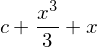

In [51]:
P=integrate(p,x)+c
P

In [52]:
P.subs(x,1)-P.subs(x,-2)

## Exercise 2

Given the function
\\[
m(x)=x^2+\frac{1}{x^2}
\\]
evaluate the definite integal
\\[
\int_{1}^{3}m(x)dx
\\]
by the __two methods__ outlined in __Example 2.__

# Applications of Integration

## Example 3

An object is moving so that its speed after t minutes is 
\\[
v(t) = 1+4t+3t^2
\\]
meters per minute. 

1. Find a general formula for the displacement, if the displacement at $t=1$ is 25 meters.

2. Hence, find the distance travelled between $t=1$ and $t=5$

__Note:__ Recall that displacement and velocity are related  by
\\[
 v(t)=\frac{ds}{dt}\quad
 \Rightarrow\quad s(t)=\int v(t)dt
\\]




### Part 1

#### Step 1 - Define a symbol for time


In [40]:
t=symbols('t')

#### Step 2 - Write an expression for $v(t)$


In [41]:
v=1+4*t*3*t**2

#### Step 3 - Find the _indefinite_ integral of $v(t)$ to find the general formula for s


In [42]:
s=integrate(v,t)+c
s

#### Step 4 - Solve for $c$

* We know that at $t=1$ then $s=25$.


* Finding an expression for $s$ at $t=1$ we use __subs()__ as follows:

In [43]:
s1=s.subs(t,1)
s1

* Now we use __sovle(s1-25,c)__ to see which value of $c$ gives an initial displacement of $25$ meters  

In [44]:
solve(s1-25,c)

Hence, the actual formula for the displacement is given by

In [45]:
s=integrate(v,t)+21
s

### Part 2 -Find the _definite_ integral of $v(t)$ when $t$ is between 1 and 5 minutes. 
This gives the total distance travelled in that time interval

In [46]:
D=integrate(v,(t,1,5))
D

Hence the distance travelled between $t=1$ and $t=5$ is $1876$ meters.

## Exercise 3

After its brakes are applied, a certain car decelerates at the constant rate of $6\rm{m/s/s}$. Mathematically, this means
\\[
 a=-6\quad \Rightarrow \quad \frac{dv}{dt}=-6, 
\\]
where $v$ is the velocity of the car.

If the car is traveling at 30 meters per second when the brakes are applied at $t=0$, how far does it travel before coming to a complete stop?

__Note:__ This is like the previous question but since given we are given __acceleration__ $a=-6$  must integrate once to get velocity, and integrate again to get displacement.

#### Part 1- Evaluate the _indefinite integral_ of  $a$ to find a general formula for the velocity $v(t)$

#### Part 2 - Evaluate the indefinite integral at $t=0$

#### Part 3 - Use solve() to evaluate c 

#### Part 4 - Write the exact formula for $v(t)$

#### Part 5 - Now use solve() to find the value $t=t1$ when $v(t)=0$.

#### Part 6 - Integrate $v(t)$ over the interval $0\le t \le t1$ to find the distance the car travels while decelerating

## Example 4

Recall that given, two functions, $f$ and $g$, with $f(x)\ge g(x)$ over an interval $x=a$ to $x=b$ then the area between the two functions is given by
\\[
    \int_a^b \big[f(x)-g(x)\big] dx
\\]

Determine the size of the shaded area in the following diagram

![](http://cdn-5.analyzemath.com/calculus/Integrals/area_under_curve_4.gif)

#### Outline of solution

 1. Define functions, $f$ and $g$ to represent each curve. (__Note:__ Make sure $f$ is the __upper function__)
    
 2. Determine the points of intersection of the curves - these are the integration limits.
 
 3. Determine the required area using definite integration.

#### Part 1 - Define the functions $f$ and $g$ 


In [31]:
f=-x**2+6
g=x**2-2*x+2

#### Part 2 - Use __solve(f-g,x)__ to find points of intersection of the curves


In [33]:
L=solve(f-g,x)
L

These are the limits of integration, and we cal call an individual limit using the index notation __L[0]__ and __L[1]__.

#### Part 4 - Integrate $f-g$ between these two points of interestion.

In [34]:
integrate(f-g,(x,L[0],L[1]))

Hence, the area between the two curves is $9$ square units.

## Exercise 4

Determine the size of the shaded area in the following diagram

![](http://bestmaths.net/online/files/8213/8655/6257/Y12_Area_under_Curves_09.gif)


#### Define the funcitons $y1$ and $y2$

In [29]:
y1=
y2=

#### Part 2 - Find the points of intersection

#### Part 3 - Determine the area by integrating  $y1-y2$ between these two points